In [1]:
!cp -r /content/drive/MyDrive/Pose_Estimation_Paper/* /content/

In [2]:
!unzip -j /content/images.zip -d /content/images/ > /dev/null

In [3]:
!unzip -j /content/images2.zip -d /content/images2/ > /dev/null

In [4]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

from scipy.spatial.transform import Rotation as ROT

In [5]:
cam_mat = np.array([[711.111, 0, 256.0], [0, 711.111, 256.0], [0, 0, 1]])
keypts = np.array([
  [6.816, -0.013, 0.021],
  [5.956, -0.013, -3.356],
  [5.777, -1.405, -0.004],
  [5.777, 1.345, -0.004],
  [5.956, -0.013, 1.196],
  [3.661, -12.531, 0.097],
  [-0.306, -12.531, 0.097],
  [1.704, -1.753, 0.097],
  [1.704, 1.889, 0.097],
  [3.661, 12.542, 0.097],
  [-0.306, 12.537, 0.097],
  [-6.720, -0.013, 0.011],
  [-4.292, -0.013, 2.201],
  [-4.292, 1.575, -1.476],
  [-4.292, -1.625, -1.476],
  [-2.516, 0.093, -8.451],
  [0.456, 0.093, -8.451],
  [-1.127, 0.093, -1.775],
  [1.772, 0.025, -1.689],
  [1.919, 0.025, 1.776],
  [-1.596, 0.025, 1.547]
])

In [6]:
df = pd.read_pickle('dataset.zip')

In [7]:
df.head()

,Image,x,y,z,qw,qx,qy,qz,bx,by,bw,bh,pbx,pby,pbw,pbh,ppbx,ppby,ppbw,ppbh
0,img1.jpg,0.733,-1.050,60.177,0.424,-0.329,0.838,-0.096,247.680616,240.004065,184.204553,278.976437,248.589081,234.635437,187.433929,281.510956,248.589081,234.635437,281.510956,281.510956
1,img2.jpg,-2.675,3.939,55.630,-0.094,-0.304,0.263,0.911,231.409574,316.186593,192.162597,323.934479,227.977051,311.201172,197.357269,323.950348,227.977051,311.201172,323.950348,323.950348
2,img3.jpg,-2.389,5.136,56.913,-0.056,-0.477,-0.852,0.209,222.530529,344.785139,307.732287,218.206248,223.316528,341.931763,312.738037,216.947556,223.316528,341.931763,312.738037,312.738037
3,img4.jpg,-2.446,-1.007,53.320,-0.706,-0.255,0.310,-0.584,222.464975,255.793595,349.354942,181.055533,225.731110,248.589142,366.183197,185.882172,225.731110,248.589142,366.183197,366.183197
4,img5.jpg,4.701,0.091,51.103,0.798,-0.505,-0.325,-0.046,354.442635,257.882250,234.341452,251.664828,352.793091,250.658936,233.757797,260.979523,352.793091,250.658936,260.979523,260.979523


In [41]:
N = len(df)
all_keypts = np.zeros((N,21,2), dtype=np.float32)

for i in range(N):
  rot_mat = np.squeeze(ROT.from_quat(df.iloc[[i]][['qx','qy','qz','qw']].values).as_matrix())
  t_vec = np.squeeze(df.iloc[[i]][['x','y','z']].values)

  cam_frame_pts = np.dot(keypts, rot_mat.T) + t_vec
  img_pts = np.squeeze(cv2.projectPoints(cam_frame_pts, np.eye(3), np.zeros(3), cam_mat, np.zeros(5))[0])

  all_keypts[i] = img_pts

for i in range(21):
  df['k'+str(i)+'x'] = all_keypts[:,i,0]
  df['k'+str(i)+'y'] = all_keypts[:,i,1]

In [19]:
df.head()

,Image,x,y,z,qw,qx,qy,qz,bx,by,...,k16x,k16y,k17x,k17y,k18x,k18y,k19x,k19y,k20x,k20y
0,img1.jpg,0.733,-1.050,60.177,0.424,-0.329,0.838,-0.096,247.680616,240.004065,...,189.945709,231.244659,253.619354,250.548904,240.170822,228.151749,271.782166,230.958847,286.635193,257.917267
1,img2.jpg,-2.675,3.939,55.630,-0.094,-0.304,0.263,0.911,231.409574,316.186593,...,285.448547,258.061310,246.898514,301.017242,215.284241,290.737976,188.851822,307.310211,227.122437,319.064240
2,img3.jpg,-2.389,5.136,56.913,-0.056,-0.477,-0.852,0.209,222.530529,344.785139,...,237.468002,355.349335,237.631012,316.634521,217.355408,344.867096,209.398865,333.110229,234.796539,297.345734
3,img4.jpg,-2.446,-1.007,53.320,-0.706,-0.255,0.310,-0.584,222.464975,255.793595,...,236.734924,336.321350,222.287674,249.633606,229.262070,274.576111,224.514420,243.213257,217.389938,213.465500
4,img5.jpg,4.701,0.091,51.103,0.798,-0.505,-0.325,-0.046,354.442635,257.882250,...,388.071930,156.973068,322.878113,232.692749,351.048553,244.185944,328.609894,284.053040,294.332458,269.908508


In [22]:
df.columns

Index(['Image', 'x', 'y', 'z', 'qw', 'qx', 'qy', 'qz', 'bx', 'by', 'bw', 'bh',
       'pbx', 'pby', 'pbw', 'pbh', 'ppbx', 'ppby', 'ppbw', 'ppbh', 'k0x',
       'k0y', 'k1x', 'k1y', 'k2x', 'k2y', 'k3x', 'k3y', 'k4x', 'k4y', 'k5x',
       'k5y', 'k6x', 'k6y', 'k7x', 'k7y', 'k8x', 'k8y', 'k9x', 'k9y', 'k10x',
       'k10y', 'k11x', 'k11y', 'k12x', 'k12y', 'k13x', 'k13y', 'k14x', 'k14y',
       'k15x', 'k15y', 'k16x', 'k16y', 'k17x', 'k17y', 'k18x', 'k18y', 'k19x',
       'k19y', 'k20x', 'k20y'],
      dtype='object')

In [52]:
N = len(df)
all_cropped_keypts = np.zeros((N,21,2), dtype=np.float32)

for i in range(N):
  ppbox = df.iloc[i][['ppbx','ppby','ppbw','ppbh']].values
  bx = ppbox[0]
  by = ppbox[1]
  bb = ppbox[2]

  kp = all_keypts[i].copy()

  kp[:,0] -= (bx - bb/2)
  kp[:,1] -= (by - bb/2)
  kp /= bb
  kp *= 512

  all_cropped_keypts[i] = kp

for i in range(21):
  df['ck'+str(i)+'x'] = all_cropped_keypts[:,i,0]
  df['ck'+str(i)+'y'] = all_cropped_keypts[:,i,1]

In [57]:
df.head()

,Image,x,y,z,qw,qx,qy,qz,bx,by,...,ck16x,ck16y,ck17x,ck17y,ck18x,ck18y,ck19x,ck19y,ck20x,ck20y
0,img1.jpg,0.733,-1.050,60.177,0.424,-0.329,0.838,-0.096,247.680616,240.004065,...,149.341965,249.832993,265.148834,284.942719,240.689240,244.207748,298.182587,249.313171,325.196625,298.343994
1,img2.jpg,-2.675,3.939,55.630,-0.094,-0.304,0.263,0.911,231.409574,316.186593,...,346.833069,172.013031,285.905151,239.904404,235.939148,223.658142,194.162994,249.850372,254.649292,268.427490
2,img3.jpg,-2.389,5.136,56.913,-0.056,-0.477,-0.852,0.209,222.530529,344.785139,...,279.168121,277.966614,279.434998,214.584549,246.240738,260.805603,233.214661,241.557800,274.794525,183.005844
3,img4.jpg,-2.446,-1.007,53.320,-0.706,-0.255,0.310,-0.584,222.464975,255.793595,...,271.385620,378.667786,251.185364,257.460388,260.937012,292.335175,254.298813,248.483398,244.337311,206.889862
4,img5.jpg,4.701,0.091,51.103,0.798,-0.505,-0.325,-0.046,354.442635,257.882250,...,325.211426,72.203339,197.311600,220.753220,252.577499,243.301025,208.556442,321.513885,141.309601,293.764587


In [58]:
df.columns

Index(['Image', 'x', 'y', 'z', 'qw', 'qx', 'qy', 'qz', 'bx', 'by',
       ...
       'ck16x', 'ck16y', 'ck17x', 'ck17y', 'ck18x', 'ck18y', 'ck19x', 'ck19y',
       'ck20x', 'ck20y'],
      dtype='object', length=104)

(-0.5, 511.5, 511.5, -0.5)

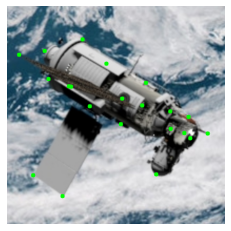

In [56]:
img = cv2.imread('/content/images2/'+df.iloc[250]['Image'])

for i in range(21):
  img = cv2.circle(img, (int(df.iloc[250]['ck'+str(i)+'x']),int(df.iloc[250]['ck'+str(i)+'y'])), radius=5, color=(0, 255, 0), thickness=-1)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

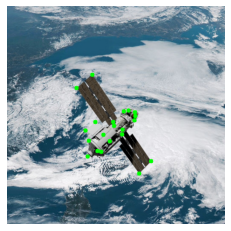

In [44]:
rot_mat = np.squeeze(ROT.from_quat(df.iloc[[20]][['qx','qy','qz','qw']].values).as_matrix())
t_vec = np.squeeze(df.iloc[[20]][['x','y','z']].values)

cam_frame_pts = np.dot(keypts, rot_mat.T) + t_vec
img_pts = np.squeeze(cv2.projectPoints(cam_frame_pts, np.eye(3), np.zeros(3), cam_mat, np.zeros(5))[0])

img = cv2.imread('/content/images/'+df.iloc[20]['Image'])

for i in range(21):
  img = cv2.circle(img, (int(df.iloc[20]['k'+str(i)+'x']),int(df.iloc[20]['k'+str(i)+'y'])), radius=5, color=(0, 255, 0), thickness=-1)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

In [59]:
df.to_pickle('dataset.zip')
!cp -r /content/dataset.zip /content/drive/MyDrive/Pose_Estimation_Paper/